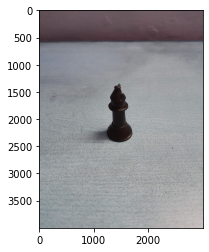

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "drive/MyDrive/Chess_Piece_Images"
CATEGORIES = [ "Black_Bishop" , "White_Bishop" , "Black_Knight" , "White_Knight" , "Black_Rook" , "White_Rook" , 
              "Black_King" , "White_King"  , "Black_Queen" , "White_Queen" , "Black_Pawn" , "White_Pawn"]

for category in CATEGORIES : 
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path) :
        img_array = cv2.imread(os.path.join(path,img) )  # cv2.IMREAD_GRAYSCALE
        plt.imshow(img_array)
        break
    break

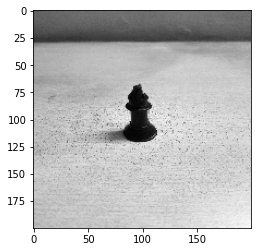

In [2]:
IMG_SIZE = 200

new_array = cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
gray  = gray = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)

plt.imshow(gray , cmap="gray")
plt.show()

In [3]:
training_data = []

def create_training_data() :
    for category in CATEGORIES : 
        path = os.path.join(DATADIR,category)
    
        class_num = CATEGORIES.index(category) 
    
        for img in os.listdir(path) :
            
            
            img_array = cv2.imread(os.path.join(path,img)) # cv2.IMREAD_GRAYSCALE
                
            new_array = cv2.resize(img_array , (IMG_SIZE , IMG_SIZE))
                #training_data.append([new_array, class_num])
                
            #gray = cv2.cvtColor(new_array)
            training_data.append([new_array  , class_num])
            
            
        
create_training_data()

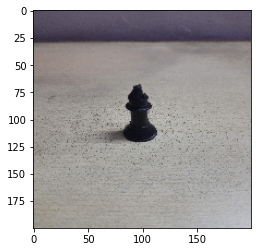

In [4]:
new_image = cv2.cvtColor(training_data[0][0] , cv2.COLOR_BGR2RGB)
plt.imshow(new_image)

In [5]:
import random
random.shuffle(training_data)

Text(0.5, 1.0, 'White_Bishop')

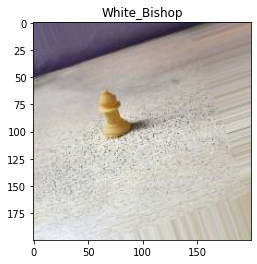

In [6]:
import random

index = random.randint(0,2520)
img_arr = cv2.cvtColor(training_data[index][0] , cv2.COLOR_BGR2RGB)




y = training_data[index][1]

plt.imshow(img_arr , cmap="gray")
plt.title(CATEGORIES[y])

In [11]:
import pandas as pd

pd.DataFrame(training_data)[1].value_counts()

7     210
6     210
1     210
2     210
10    210
8     210
11    210
5     210
4     210
0     210
9     210
3     210
Name: 1, dtype: int64

In [12]:
X = []
y = []

for features , label in training_data :
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE , IMG_SIZE , 3) 

In [16]:
import tensorflow as tf

tf.math.reduce_max(X)

<tf.Tensor: shape=(), dtype=uint8, numpy=255>

In [17]:
X = X/255.0

In [18]:
tf.math.reduce_max(X)

<tf.Tensor: shape=(), dtype=float64, numpy=1.0>

In [19]:
pd.DataFrame(y).value_counts()

0     210
1     210
2     210
3     210
4     210
5     210
6     210
7     210
8     210
9     210
10    210
11    210
dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size = 0.2)

In [21]:
import tensorflow as tf


X_train , y_train = tf.constant(X_train , dtype = tf.float64) , tf.constant(y_train , dtype = tf.float64)
X_test , y_test = tf.constant(X_test , dtype = tf.float64) , tf.constant(y_test , dtype = tf.float64)

In [22]:
len(X_train) , len(y_train) 

(2016, 2016)

In [23]:
len(X_test) , len(y_test)

(504, 504)

In [24]:
pd.DataFrame(y_train).value_counts()

0.0     177
11.0    177
9.0     171
2.0     170
10.0    168
3.0     167
1.0     165
5.0     165
6.0     165
7.0     164
8.0     164
4.0     163
dtype: int64

In [25]:
pd.DataFrame(y_test).value_counts()

4.0     47
7.0     46
8.0     46
1.0     45
5.0     45
6.0     45
3.0     43
10.0    42
2.0     40
9.0     39
0.0     33
11.0    33
dtype: int64


 CATEGORIES = [ "Black_Bishop" , "White_Bishop" , "Black_Knight" , "White_Knight" , "Black_Rook" , "White_Rook" , "Black_King" , "White_King", "Black_Queen" , "White_Queen" , "Black_Pawn" , "White_Pawn"]

In [ ]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

#1. Define a model
cnn_model = tf.keras.Sequential([
                                 tf.keras.Input( shape=(200, 200, 3) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(12 , (3,3) , activation = 'softmax' , padding = 'same') ,

                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam() , 
                  metrics = ['accuracy'])

#3. Learning Rate Schedular
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * (10)**(epoch/20))

#4. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 50 , 
                        callbacks = [lr_schedular] ,
                        validation_data = (X_test , y_test))


Epoch 1/50
63/63 [==============================] - 18s 114ms/step - loss: 2.4963 - accuracy: 0.0784 - val_loss: 2.5071 - val_accuracy: 0.0635 - lr: 1.0000e-04
Epoch 2/50
63/63 [==============================] - 6s 95ms/step - loss: 2.4972 - accuracy: 0.0764 - val_loss: 2.5009 - val_accuracy: 0.0794 - lr: 1.1220e-04
Epoch 3/50
63/63 [==============================] - 6s 94ms/step - loss: 2.4954 - accuracy: 0.0794 - val_loss: 2.5086 - val_accuracy: 0.0873 - lr: 1.2589e-04
Epoch 4/50
63/63 [==============================] - 6s 95ms/step - loss: 2.4962 - accuracy: 0.0898 - val_loss: 2.5022 - val_accuracy: 0.0893 - lr: 1.4125e-04
Epoch 5/50
63/63 [==============================] - 6s 96ms/step - loss: 2.4708 - accuracy: 0.0933 - val_loss: 2.3827 - val_accuracy: 0.1984 - lr: 1.5849e-04
Epoch 6/50
63/63 [==============================] - 6s 94ms/step - loss: 2.2352 - accuracy: 0.1994 - val_loss: 2.0625 - val_accuracy: 0.2560 - lr: 1.7783e-04
Epoch 7/50
63/63 [==============================] 

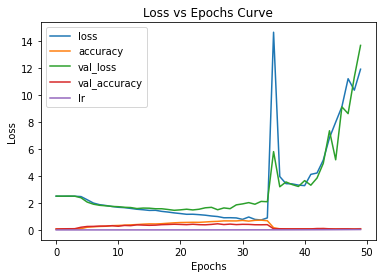

In [ ]:
# Plot the loss vs epochs diagram
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs Curve")
plt.show()

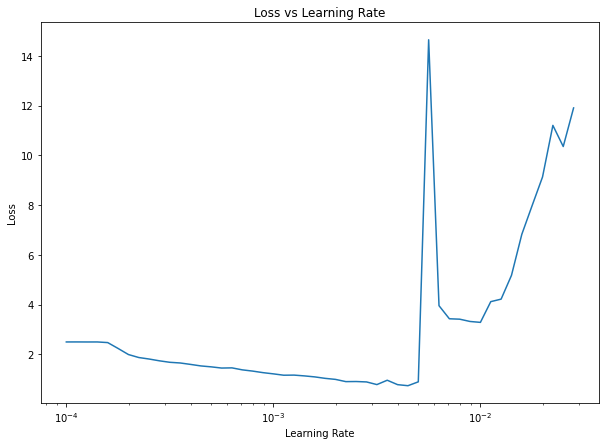

In [ ]:
# Plot Loss vs Learning Rate curve

lrs = 1e-4 * (10**(tf.range(50)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Loss vs Learning Rate")
plt.show()



In [ ]:
# Ideal learning rate seems to be around 5*(10**(-3))

In [ ]:
y_probs = tf.constant(cnn_model.predict(X_test))

In [ ]:
y_preds = pd.DataFrame(tf.argmax(y_preds , axis = 1))
len(y_preds)

504

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , y_preds)

0.08531746031746032

In [ ]:
# Using ideal learning rate 

import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

#1. Define a model
cnn_model = tf.keras.Sequential([
                                 tf.keras.Input( shape=(200, 200, 3) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(12 , (3,3) , activation = 'softmax' , padding = 'same') ,

                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam(10**(-3)) , 
                  metrics = ['accuracy'])




#3. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 50 , 
                        validation_data = (X_test , y_test))


Epoch 1/50
63/63 [==============================] - 7s 98ms/step - loss: 2.5706 - accuracy: 0.0853 - val_loss: 2.6456 - val_accuracy: 0.0893
Epoch 2/50
63/63 [==============================] - 6s 93ms/step - loss: 2.5484 - accuracy: 0.0858 - val_loss: 2.3526 - val_accuracy: 0.1905
Epoch 3/50
63/63 [==============================] - 6s 93ms/step - loss: 2.0110 - accuracy: 0.2197 - val_loss: 1.9758 - val_accuracy: 0.1746
Epoch 4/50
63/63 [==============================] - 6s 92ms/step - loss: 1.7655 - accuracy: 0.2907 - val_loss: 1.7671 - val_accuracy: 0.2718
Epoch 5/50
63/63 [==============================] - 6s 92ms/step - loss: 1.6243 - accuracy: 0.3517 - val_loss: 1.6769 - val_accuracy: 0.2698
Epoch 6/50
63/63 [==============================] - 6s 92ms/step - loss: 1.4967 - accuracy: 0.3899 - val_loss: 1.5979 - val_accuracy: 0.3631
Epoch 7/50
63/63 [==============================] - 6s 92ms/step - loss: 1.4362 - accuracy: 0.4286 - val_loss: 1.5511 - val_accuracy: 0.3790
Epoch 8/50
63

In [ ]:
# Changing the network architecture

# Using ideal learning rate 

import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

#1. Define a model
cnn_model = tf.keras.Sequential([
                                 tf.keras.Input( shape=(200, 200, 3) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'softmax' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same'),

                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam(10**(-3)) , 
                  metrics = ['accuracy'])




#3. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 50 , 
                        validation_data = (X_test , y_test))

Epoch 1/50
63/63 [==============================] - 7s 97ms/step - loss: 2.5709 - accuracy: 0.0878 - val_loss: 2.6476 - val_accuracy: 0.0893
Epoch 2/50
63/63 [==============================] - 6s 92ms/step - loss: 2.5621 - accuracy: 0.0784 - val_loss: 2.5172 - val_accuracy: 0.0794
Epoch 3/50
63/63 [==============================] - 6s 94ms/step - loss: 2.5455 - accuracy: 0.0843 - val_loss: 2.6612 - val_accuracy: 0.0675
Epoch 4/50
63/63 [==============================] - 6s 93ms/step - loss: 2.5768 - accuracy: 0.0898 - val_loss: 2.6847 - val_accuracy: 0.0833
Epoch 5/50
63/63 [==============================] - 6s 95ms/step - loss: 2.5699 - accuracy: 0.0878 - val_loss: 2.5949 - val_accuracy: 0.0873
Epoch 6/50
63/63 [==============================] - 6s 93ms/step - loss: 2.5537 - accuracy: 0.0828 - val_loss: 2.5946 - val_accuracy: 0.0833
Epoch 7/50
63/63 [==============================] - 6s 93ms/step - loss: 2.5799 - accuracy: 0.0774 - val_loss: 2.5787 - val_accuracy: 0.0794
Epoch 8/50
63

In [ ]:
y_probs = cnn_model.predict(X_test)
y_probs

array([[0.08814555, 0.04068923, 0.05812258, ..., 0.04289176, 0.05511189,
        0.06026721],
       [0.0881455 , 0.04068922, 0.05812251, ..., 0.04289168, 0.05511185,
        0.06026716],
       [0.08814555, 0.04068923, 0.05812258, ..., 0.04289176, 0.05511189,
        0.06026721],
       ...,
       [0.08814555, 0.04068923, 0.05812258, ..., 0.04289176, 0.05511189,
        0.06026721],
       [0.08814555, 0.04068923, 0.05812258, ..., 0.04289176, 0.05511189,
        0.06026721],
       [0.08814555, 0.04068923, 0.05812258, ..., 0.04289176, 0.05511189,
        0.06026721]], dtype=float32)

In [ ]:
y_preds = tf.argmax(y_probs , axis = 1)
y_preds

<tf.Tensor: shape=(504,), dtype=int64, numpy=
array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
     

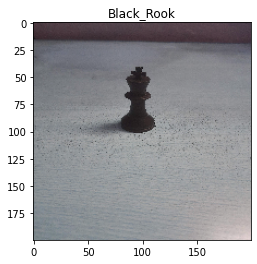

In [ ]:
# Visualising model predictions
import random

index = random.randint(0,504)
random_image = X_test[index]
image_pred = CATEGORIES[y_preds[index]]

plt.imshow(random_image)
plt.title(image_pred)
plt.show()


In [ ]:
X_test[503].shape

TensorShape([200, 200, 3])

In [ ]:
y_preds[0][500]

0

In [ ]:
y_preds.value_counts()

0    504
dtype: int64

### Currently the neural network is just predictin the same class for all inputs
### Potential Reason :  Model is not complex enough to understand the patterns in input
### Try :  Making the model more complex by adding layers


In [26]:

import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

#1. Define a model
cnn_model = tf.keras.Sequential([
                                 tf.keras.Input( shape=(200, 200, 3) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'sigmoid' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 # New Layer

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,


                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam(10**(-3)) , 
                  metrics = ['accuracy'])




#3. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 50 , 
                        validation_data = (X_test , y_test))

Epoch 1/50
63/63 [==============================] - 19s 120ms/step - loss: 2.5611 - accuracy: 0.0843 - val_loss: 2.5536 - val_accuracy: 0.0992
Epoch 2/50
63/63 [==============================] - 6s 99ms/step - loss: 2.5145 - accuracy: 0.0977 - val_loss: 2.4758 - val_accuracy: 0.0913
Epoch 3/50
63/63 [==============================] - 6s 100ms/step - loss: 2.2156 - accuracy: 0.1508 - val_loss: 1.8815 - val_accuracy: 0.2381
Epoch 4/50
63/63 [==============================] - 6s 99ms/step - loss: 1.8359 - accuracy: 0.2267 - val_loss: 1.7632 - val_accuracy: 0.2976
Epoch 5/50
63/63 [==============================] - 6s 101ms/step - loss: 1.7600 - accuracy: 0.2510 - val_loss: 1.7767 - val_accuracy: 0.2659
Epoch 6/50
63/63 [==============================] - 6s 98ms/step - loss: 1.7122 - accuracy: 0.2817 - val_loss: 1.6953 - val_accuracy: 0.2738
Epoch 7/50
63/63 [==============================] - 6s 99ms/step - loss: 1.6420 - accuracy: 0.3065 - val_loss: 1.6836 - val_accuracy: 0.2401
Epoch 8/5

In [ ]:
# Fitting the model for another 50 epochs

#3. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 50 , 
                        validation_data = (X_test , y_test))

Epoch 1/50
63/63 [==============================] - 6s 99ms/step - loss: 0.4859 - accuracy: 0.8313 - val_loss: 1.4420 - val_accuracy: 0.5040
Epoch 2/50
63/63 [==============================] - 6s 98ms/step - loss: 0.4952 - accuracy: 0.8219 - val_loss: 1.3870 - val_accuracy: 0.5060
Epoch 3/50
63/63 [==============================] - 6s 98ms/step - loss: 0.4807 - accuracy: 0.8279 - val_loss: 1.3753 - val_accuracy: 0.4921
Epoch 4/50
63/63 [==============================] - 6s 98ms/step - loss: 0.4417 - accuracy: 0.8542 - val_loss: 1.4055 - val_accuracy: 0.5159
Epoch 5/50
63/63 [==============================] - 6s 98ms/step - loss: 0.4211 - accuracy: 0.8651 - val_loss: 1.3788 - val_accuracy: 0.5020
Epoch 6/50
63/63 [==============================] - 6s 98ms/step - loss: 0.4069 - accuracy: 0.8725 - val_loss: 1.3913 - val_accuracy: 0.5238
Epoch 7/50
63/63 [==============================] - 6s 99ms/step - loss: 0.4311 - accuracy: 0.8542 - val_loss: 1.4437 - val_accuracy: 0.5397
Epoch 8/50
63

In [27]:
y_probs = cnn_model.predict(X_test)
y_preds = tf.argmax(y_probs , axis = 1)

In [28]:
pd.DataFrame(y_preds).value_counts()

3     66
8     51
10    46
2     45
4     45
6     45
5     39
7     39
9     39
1     35
11    34
0     20
dtype: int64

In [39]:
# Visualising model predictions
import random

index = random.randint(0,504)
random_image = X_test[index]
image_pred = CATEGORIES[y_preds[index]]|

plt.imshow(random_image)
plt.title(image_pred)
plt.show()


SyntaxError: ignored

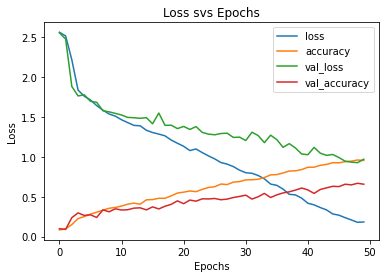

In [40]:
# Plot the Loss vs Epochs

pd.DataFrame(history.history).plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss svs Epochs")
plt.show()

In [47]:
# Use Daniel Bourkee's code to plot a multi-class confusion matrix

# Create a confusion matrix for our new model
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
   
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels,)
  
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
  plt.xticks(rotation=45)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

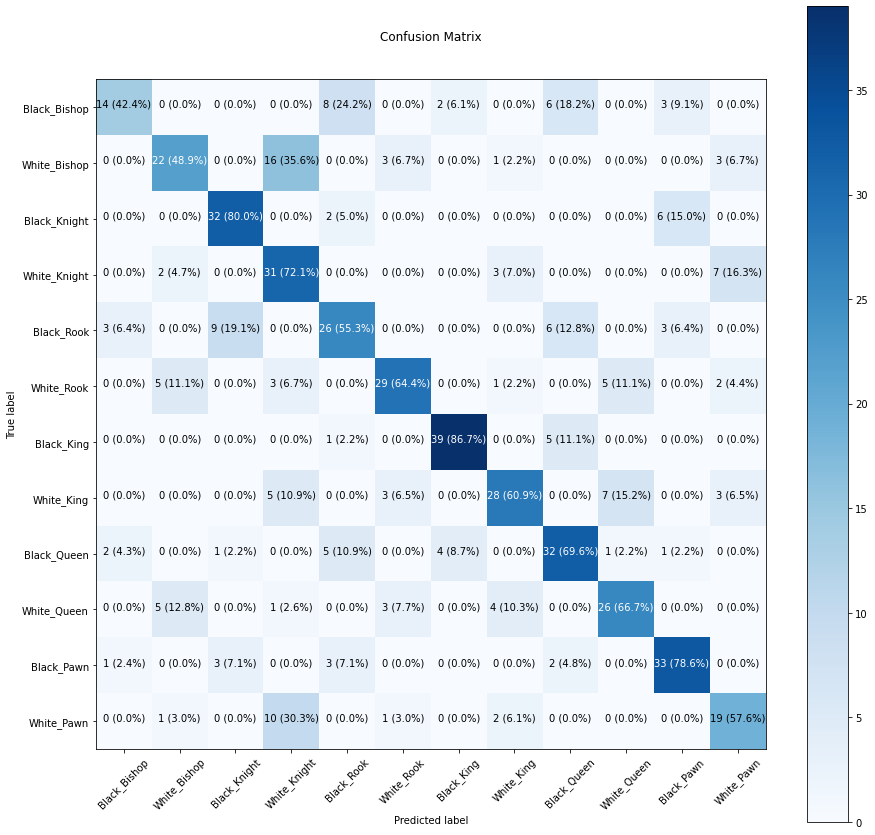

In [49]:

make_confusion_matrix(y_true = y_test,
                      y_pred = y_preds,
                      classes = CATEGORIES,
                      figsize = (15,15),
                      text_size = 10)

In [50]:
# Adding another layer to make the model more complex

import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

#1. Define a model
cnn_model = tf.keras.Sequential([
                                 tf.keras.Input( shape=(200, 200, 3) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,  # New Layer

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'sigmoid' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,


                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam(10**(-3)) , 
                  metrics = ['accuracy'])




#3. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 50 , 
                        validation_data = (X_test , y_test))

Epoch 1/50
63/63 [==============================] - 8s 106ms/step - loss: 2.5195 - accuracy: 0.0833 - val_loss: 2.5115 - val_accuracy: 0.0655
Epoch 2/50
63/63 [==============================] - 6s 101ms/step - loss: 2.5078 - accuracy: 0.0908 - val_loss: 2.5007 - val_accuracy: 0.0655
Epoch 3/50
63/63 [==============================] - 6s 101ms/step - loss: 2.4011 - accuracy: 0.1071 - val_loss: 2.0849 - val_accuracy: 0.1885
Epoch 4/50
63/63 [==============================] - 6s 101ms/step - loss: 1.9508 - accuracy: 0.1801 - val_loss: 1.8692 - val_accuracy: 0.2321
Epoch 5/50
63/63 [==============================] - 6s 102ms/step - loss: 1.7964 - accuracy: 0.2495 - val_loss: 1.7559 - val_accuracy: 0.2996
Epoch 6/50
63/63 [==============================] - 7s 111ms/step - loss: 1.7118 - accuracy: 0.2832 - val_loss: 1.6804 - val_accuracy: 0.3095
Epoch 7/50
63/63 [==============================] - 6s 101ms/step - loss: 1.6724 - accuracy: 0.2867 - val_loss: 1.6884 - val_accuracy: 0.2758
Epoch 

In [53]:
history = cnn_model.fit(X_train , y_train , epochs = 25,  
                        validation_data = (X_test , y_test))

Epoch 1/25
63/63 [==============================] - 7s 105ms/step - loss: 0.7039 - accuracy: 0.7282 - val_loss: 1.3205 - val_accuracy: 0.5258
Epoch 2/25
63/63 [==============================] - 6s 100ms/step - loss: 0.6932 - accuracy: 0.7272 - val_loss: 1.1676 - val_accuracy: 0.5397
Epoch 3/25
63/63 [==============================] - 6s 101ms/step - loss: 0.6602 - accuracy: 0.7371 - val_loss: 1.2570 - val_accuracy: 0.5357
Epoch 4/25
63/63 [==============================] - 6s 100ms/step - loss: 0.7077 - accuracy: 0.7272 - val_loss: 1.2044 - val_accuracy: 0.5258
Epoch 5/25
63/63 [==============================] - 6s 101ms/step - loss: 0.6394 - accuracy: 0.7485 - val_loss: 1.2204 - val_accuracy: 0.5298
Epoch 6/25
63/63 [==============================] - 7s 111ms/step - loss: 0.6389 - accuracy: 0.7540 - val_loss: 1.2971 - val_accuracy: 0.5456
Epoch 7/25
63/63 [==============================] - 6s 100ms/step - loss: 0.6384 - accuracy: 0.7480 - val_loss: 1.2889 - val_accuracy: 0.5218
Epoch 

In [54]:
pd.DataFrame(y_test).value_counts()

4.0     47
7.0     46
8.0     46
1.0     45
5.0     45
6.0     45
3.0     43
10.0    42
2.0     40
9.0     39
0.0     33
11.0    33
dtype: int64

In [55]:
pd.DataFrame(y_train).value_counts()

0.0     177
11.0    177
9.0     171
2.0     170
10.0    168
3.0     167
1.0     165
5.0     165
6.0     165
7.0     164
8.0     164
4.0     163
dtype: int64

In [56]:
# Using sigmoid activation in new layer

import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

#1. Define a model
cnn_model = tf.keras.Sequential([
                                 tf.keras.Input( shape=(200, 200, 3) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'sigmoid' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,  # New Layer

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'sigmoid' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,


                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam(10**(-3)) , 
                  metrics = ['accuracy'])




#3. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 50 , 
                        validation_data = (X_test , y_test))


# Note  :  This model is not able to obtain an accuracy of more than 8-9%




Epoch 1/50
63/63 [==============================] - 9s 111ms/step - loss: 2.5156 - accuracy: 0.0764 - val_loss: 2.5105 - val_accuracy: 0.0655
Epoch 2/50
63/63 [==============================] - 6s 100ms/step - loss: 2.4999 - accuracy: 0.0754 - val_loss: 2.4952 - val_accuracy: 0.0655
Epoch 3/50
63/63 [==============================] - 6s 101ms/step - loss: 2.4986 - accuracy: 0.0804 - val_loss: 2.4949 - val_accuracy: 0.0853
Epoch 4/50
63/63 [==============================] - 6s 101ms/step - loss: 2.4933 - accuracy: 0.0794 - val_loss: 2.5050 - val_accuracy: 0.0655
Epoch 5/50
63/63 [==============================] - 6s 101ms/step - loss: 2.4988 - accuracy: 0.0833 - val_loss: 2.4979 - val_accuracy: 0.0913
Epoch 6/50
63/63 [==============================] - 6s 101ms/step - loss: 2.4931 - accuracy: 0.0774 - val_loss: 2.4922 - val_accuracy: 0.0893
Epoch 7/50
63/63 [==============================] - 6s 101ms/step - loss: 2.4956 - accuracy: 0.0804 - val_loss: 2.4908 - val_accuracy: 0.0774
Epoch 

KeyboardInterrupt: ignored

In [57]:
# Using tanh acvtivation in new layer



# Set random seed
tf.random.set_seed(42)

#1. Define a model
cnn_model = tf.keras.Sequential([
                                 tf.keras.Input( shape=(200, 200, 3) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,  # New Layer

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'sigmoid' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,


                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam(10**(-3)) , 
                  metrics = ['accuracy'])




#3. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 50 , 
                        validation_data = (X_test , y_test))

# This model is also giving very low accuracy. Relu activation worked the best for the new layer



Epoch 1/50
63/63 [==============================] - 8s 106ms/step - loss: 2.5193 - accuracy: 0.0828 - val_loss: 2.5081 - val_accuracy: 0.0655
Epoch 2/50
63/63 [==============================] - 6s 100ms/step - loss: 2.5064 - accuracy: 0.0878 - val_loss: 2.5013 - val_accuracy: 0.0655
Epoch 3/50
63/63 [==============================] - 6s 100ms/step - loss: 2.5008 - accuracy: 0.0729 - val_loss: 2.5038 - val_accuracy: 0.0853
Epoch 4/50
63/63 [==============================] - 6s 100ms/step - loss: 2.4920 - accuracy: 0.0848 - val_loss: 2.4954 - val_accuracy: 0.0833
Epoch 5/50
63/63 [==============================] - 6s 100ms/step - loss: 2.4940 - accuracy: 0.0794 - val_loss: 2.4913 - val_accuracy: 0.0913
Epoch 6/50
63/63 [==============================] - 6s 100ms/step - loss: 2.4909 - accuracy: 0.0833 - val_loss: 2.4919 - val_accuracy: 0.0794
Epoch 7/50
63/63 [==============================] - 6s 101ms/step - loss: 2.4951 - accuracy: 0.0729 - val_loss: 2.4904 - val_accuracy: 0.0774
Epoch 

KeyboardInterrupt: ignored

In [60]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

#1. Define a model
cnn_model = tf.keras.Sequential([
                                 tf.keras.Input( shape=(200, 200, 3) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,  # New Layer

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'sigmoid' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,


                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam() , 
                  metrics = ['accuracy'])


#3. Learning Rate Schedular
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * (10)**(epoch/20))



#4. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 50 ,
                        callbacks = [lr_schedular] , 
                        validation_data = (X_test , y_test))

Epoch 1/50
63/63 [==============================] - 8s 106ms/step - loss: 2.4962 - accuracy: 0.0853 - val_loss: 2.4985 - val_accuracy: 0.0655 - lr: 1.0000e-04
Epoch 2/50
63/63 [==============================] - 6s 101ms/step - loss: 2.4936 - accuracy: 0.0779 - val_loss: 2.4905 - val_accuracy: 0.1032 - lr: 1.1220e-04
Epoch 3/50
63/63 [==============================] - 6s 101ms/step - loss: 2.4732 - accuracy: 0.0923 - val_loss: 2.3979 - val_accuracy: 0.1766 - lr: 1.2589e-04
Epoch 4/50
63/63 [==============================] - 6s 101ms/step - loss: 2.2145 - accuracy: 0.1736 - val_loss: 2.0397 - val_accuracy: 0.2103 - lr: 1.4125e-04
Epoch 5/50
63/63 [==============================] - 6s 101ms/step - loss: 1.9572 - accuracy: 0.1860 - val_loss: 1.9005 - val_accuracy: 0.2381 - lr: 1.5849e-04
Epoch 6/50
63/63 [==============================] - 6s 101ms/step - loss: 1.8529 - accuracy: 0.2247 - val_loss: 1.8347 - val_accuracy: 0.2480 - lr: 1.7783e-04
Epoch 7/50
63/63 [============================

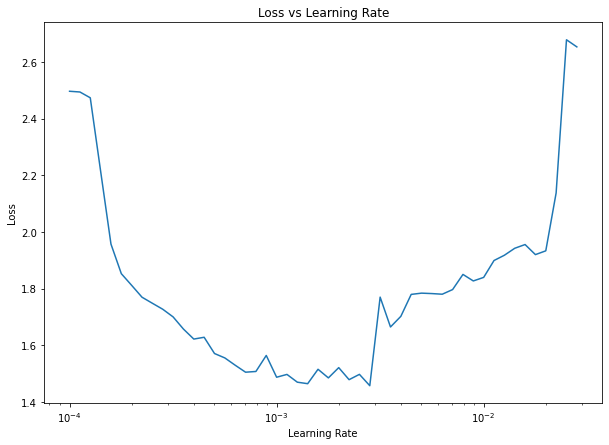

In [61]:
# Plot Loss vs Learning Rate curve

lrs = 1e-4 * (10**(tf.range(50)/20))
plt.figure(figsize = (10,7))
plt.semilogx(lrs,history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Loss vs Learning Rate")
plt.show()


In [62]:
# The best learning rate is around 10**-3

import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

#1. Define a model
cnn_model = tf.keras.Sequential([
                                 tf.keras.Input( shape=(200, 200, 3) ),                                 

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'relu' , padding = 'same' ) ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'relu' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,  # New Layer

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'sigmoid' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(64 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,

                                 tf.keras.layers.Conv2D(32 , (3,3) , activation = 'tanh' , padding = 'same') ,
                                 tf.keras.layers.MaxPooling2D((2,2) , padding = 'same') ,


                                 tf.keras.layers.Flatten() ,
                                 tf.keras.layers.Dense( 12 ,activation = 'softmax')


])

#2. Compile the model
cnn_model.compile( loss = 'sparse_categorical_crossentropy' ,
                  optimizer = tf.keras.optimizers.Adam(10**(-3)) , 
                  metrics = ['accuracy'])






#3. Fit the data
history = cnn_model.fit(X_train , y_train , epochs = 75 ,                        
                        validation_data = (X_test , y_test))

Epoch 1/75
63/63 [==============================] - 9s 111ms/step - loss: 2.5201 - accuracy: 0.0813 - val_loss: 2.5072 - val_accuracy: 0.0655
Epoch 2/75
63/63 [==============================] - 6s 101ms/step - loss: 2.4184 - accuracy: 0.1111 - val_loss: 2.0957 - val_accuracy: 0.2143
Epoch 3/75
63/63 [==============================] - 6s 101ms/step - loss: 1.9517 - accuracy: 0.1811 - val_loss: 1.8277 - val_accuracy: 0.2262
Epoch 4/75
63/63 [==============================] - 6s 100ms/step - loss: 1.7950 - accuracy: 0.2331 - val_loss: 1.7362 - val_accuracy: 0.2758
Epoch 5/75
63/63 [==============================] - 6s 100ms/step - loss: 1.7094 - accuracy: 0.2778 - val_loss: 1.7628 - val_accuracy: 0.2996
Epoch 6/75
63/63 [==============================] - 6s 100ms/step - loss: 1.6718 - accuracy: 0.2907 - val_loss: 1.6577 - val_accuracy: 0.2996
Epoch 7/75
63/63 [==============================] - 6s 101ms/step - loss: 1.6092 - accuracy: 0.3090 - val_loss: 1.6045 - val_accuracy: 0.3571
Epoch 

In [64]:
# Training for another 10 epochs

history = cnn_model.fit(X_train , y_train , epochs = 10 ,                                               
                        validation_data = (X_test , y_test))

Epoch 1/10
63/63 [==============================] - 7s 109ms/step - loss: 0.0122 - accuracy: 0.9995 - val_loss: 0.7890 - val_accuracy: 0.7500
Epoch 2/10
63/63 [==============================] - 6s 100ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.7931 - val_accuracy: 0.7579
Epoch 3/10
63/63 [==============================] - 6s 101ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.8073 - val_accuracy: 0.7500
Epoch 4/10
63/63 [==============================] - 6s 101ms/step - loss: 0.0091 - accuracy: 1.0000 - val_loss: 0.7977 - val_accuracy: 0.7540
Epoch 5/10
63/63 [==============================] - 6s 101ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.8068 - val_accuracy: 0.7540
Epoch 6/10
63/63 [==============================] - 6s 101ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.8011 - val_accuracy: 0.7639
Epoch 7/10
63/63 [==============================] - 6s 101ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.8066 - val_accuracy: 0.7520
Epoch 

In [65]:
# Training for another 10 epochs

history = cnn_model.fit(X_train , y_train , epochs = 10 ,                                               
                        validation_data = (X_test , y_test))

Epoch 1/10
63/63 [==============================] - 6s 102ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.8161 - val_accuracy: 0.7599
Epoch 2/10
63/63 [==============================] - 6s 100ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.8150 - val_accuracy: 0.7579
Epoch 3/10
63/63 [==============================] - 6s 100ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.8236 - val_accuracy: 0.7540
Epoch 4/10
63/63 [==============================] - 6s 101ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.8223 - val_accuracy: 0.7560
Epoch 5/10
63/63 [==============================] - 6s 100ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.8278 - val_accuracy: 0.7520
Epoch 6/10
63/63 [==============================] - 6s 100ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.8253 - val_accuracy: 0.7540
Epoch 7/10
63/63 [==============================] - 6s 100ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.8297 - val_accuracy: 0.7560
Epoch 

In [67]:
y_probs = cnn_model.predict(X_test)

In [68]:
y_preds = tf.argmax(y_probs , axis = 1)

In [69]:
pd.DataFrame(y_preds).value_counts()

10    48
6     47
8     45
5     44
1     43
7     43
9     43
3     39
11    39
2     38
4     38
0     37
dtype: int64

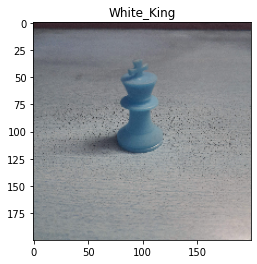

In [87]:
# Visualising model predictions
import random

index = random.randint(0,504)
random_image = X_test[index]
image_pred = CATEGORIES[y_preds[index]]

plt.imshow(random_image)
plt.title(image_pred)
plt.show()

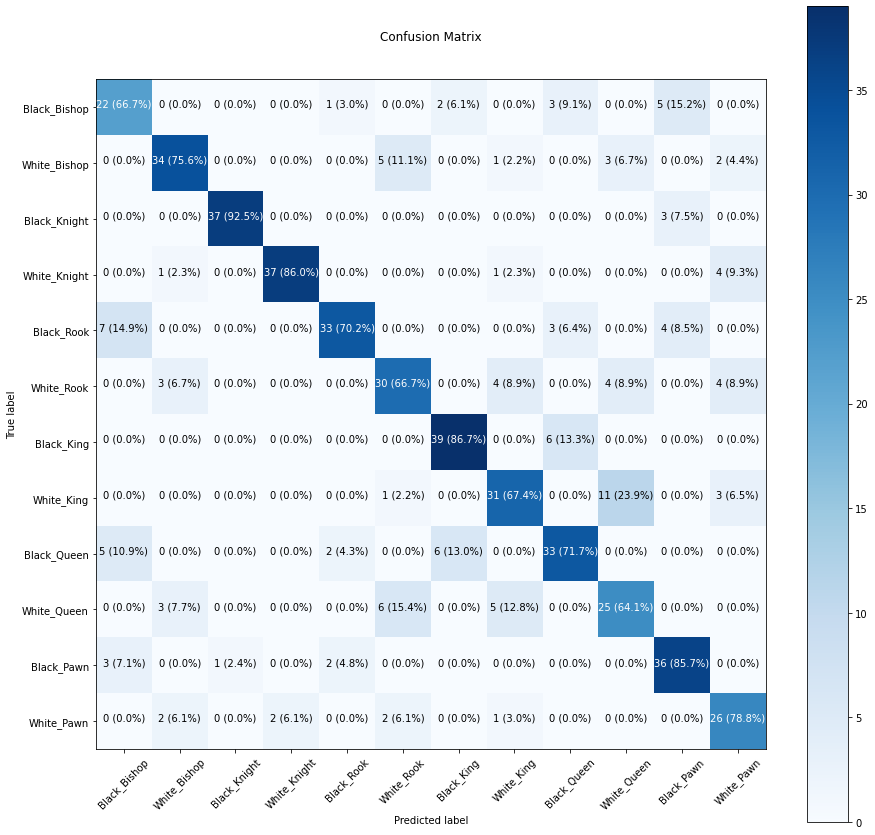

In [88]:
make_confusion_matrix(y_true = y_test,
                      y_pred = y_preds,
                      classes = CATEGORIES,
                      figsize = (15,15),
                      text_size = 10)

In [89]:
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 25, 25, 64)      

In [90]:
cnn_model_loaded = new_model = tf.keras.models.load_model('validation : 75%')

In [92]:
cnn_model_loaded.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_47 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_48 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 25, 25, 64)      